## Analyze A/B Test Results


This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [27]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [28]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [30]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [10]:
df.group.value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [11]:
df.converted.value_counts()

0    259241
1     35237
Name: converted, dtype: int64

d. The proportion of users converted.

In [6]:
len(df[df['converted']==1])/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [29]:
lineup1 = df.query("group != 'treatment' and landing_page == 'new_page'")['user_id'].count()
lineup1

1928

In [30]:
lineup2 = df.query("group == 'treatment' and landing_page != 'new_page'")['user_id'].count()
lineup2

1965

In [26]:
#number of times the new_page and treatment don't line up.
lineup1 + lineup2
#sum_lineup= 
#sum_lineup

3893

f. Do any of the rows have missing values?

In [18]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [53]:
#drop_rows = df[(df.query("group != 'treatment' and landing_page == 'new_page'").index, inplace = True)]
#drop_rows = drop_rows.append(df[(df.query("group == 'treatment' and landing_page != 'new_page'").index, inplace = True)]


In [31]:
df2 = df[((df.group == "control") & (df.landing_page == "old_page")) | ((df.group == "treatment") & (df.landing_page == "new_page"))]

In [55]:
df2.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [32]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [35]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [68]:
sum(df2['user_id'].duplicated())

1

In [38]:
# inspect duplicate userid
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [8]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [9]:
df2.shape

(290585, 5)

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [33]:
print('shape before dropping = ' + str(df2.shape))
#df2.drop([2893], inplace=True)
df2.drop(df2.index[2893], axis=0, inplace=True)
print('shape after dropping = ' + str(df2.shape))

shape before dropping = (290585, 5)
shape after dropping = (290584, 5)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df2.shape

(290584, 5)

In [40]:
df2.user_id.nunique()

290583

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [26]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [34]:
ctrl_mean = df2.query('group == "control"')['converted'].mean()
ctrl_mean


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [35]:
tre_mean = df2.query('group == "treatment"')['converted'].mean()
tre_mean

0.11880806551510564

In [93]:
ct_diff = tre_mean - ctrl_mean 
ct_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [53]:
df2.query('landing_page == "new_page"').count()/df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**There does not appear to be significant evidence to suggest that new page leads to more conversions. The above results suggest that the conversion rates for the old page appears to be slightly higher than the new page**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_0: p_{old}$** ≥ **$p_{new}$**


**$H_0: p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [36]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [37]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [38]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [39]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [40]:
new_page_converted = np.random.binomial(n_new, p_new)
#np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
new_page_converted

17530

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [41]:
old_page_converted = np.random.binomial(n_old, p_old)
#np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
old_page_converted

17441

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [78]:
new_page_converted/n_new - old_page_converted/n_old

-0.0004082206516507064

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [42]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diffs.append((new_page_converted/n_new) - (old_page_converted/n_old))
    

In [43]:
#convert to numpy array
p_diffs = np.array(p_diffs)

In [44]:
p_diffs.std()

0.0012131772611771853

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

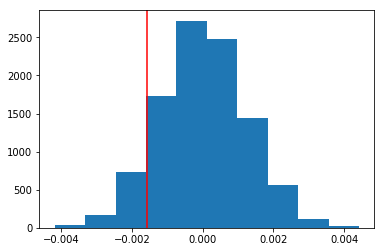

In [95]:
plt.hist(p_diffs);
plt.axvline(ct_diff, color='red') 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [94]:
#p value 
(ct_diff < p_diffs).mean()

0.9042

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We just computed the p-value. Which is the observed difference in proportions by sampling the null. There seems to be no significant difference between the convertion rates of the old and new pages, the old page only performed slightly better than the new. Since the p-value is at 90%, it is likely that our statistic is from the null. We conclude that null hypothesis is true, therefore we fail to reject the null. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [45]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [102]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


In [104]:
from scipy.stats import norm

norm.cdf(z_score) # Tells us how significant our z-score is


0.90505831275902449

In [106]:
# for our single-sides test, assumed at 95% 
#confidence level, we calculate our critical 
#value as:
norm.ppf(1-(0.05)) 

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**-We can see that our p-value in part J (0.9042) is very similar to the p-value we've just computed with the ztest (0.90505).Therefore, we can agree with the findings in part j and k as they closely correspond to our findings in our ztest.**

**-Since our critical value of 1.6448536269514722 exeeds our zscore of 1.31092419842, we still fail to reject the null and accept that the old pages' performance is better or equal to the new pages' performance. We can see with the stats model that the old page did perform better with higher convertions. **

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression** - Pedicting two possible catagorical responses.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [46]:
#Have to create a copy of the dataframe as a warning
#message appears with the original df
cop_df = df2.copy()
cop_df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [47]:
cop_df['intercept']=1
cop_df[['control', 'ab_page']]=pd.get_dummies(df2['group'])
cop_df.drop(labels=['control'], axis=1, inplace=True)
cop_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [48]:
import statsmodels.api as sm

r_model = sm.Logit(cop_df['converted'], cop_df[['intercept', 'ab_page']])
results = r_model.fit() 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:46:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value here is 0.19. 
The p-value suggests that the new page is not statistically significant as 0.19 > 0.05. 
The hypotheses in Part II was formulated to be tested in one direction, therefore, a one tail test. It was concerned with which page had the higher conversion rate. Part III is a two tail regression test. A regression test is not done to observe positive or negative change. We perform this test to see if the independent variable (new_page/ab_page) had any effect at all, therefore, a two-tailed test. **

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It may be a good idea to consider other factors to add to our regression model as it may result in insights that may not always be evident in the simpler anlysis we have done, and thereby, giving us a greater understanding of the data**

**A disadvantage associated with additional factors may be missinterpretaions of the data and test results which will lead to misleading conclusions.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [50]:
cdf = pd.read_csv('countries.csv')
cdf.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [64]:
#Merging 
new_df = cdf.set_index('user_id').join(cop_df.set_index('user_id'), how='inner') 
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [65]:
#Dummy variables
new_df[['CA','UK','US']]=pd.get_dummies(new_df['country'])
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1


In [54]:
model = sm.Logit(new_df['converted'], new_df[['intercept','ab_page', 'UK', 'US']])
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 19 Jul 2018   Pseudo R-squ.:               2.323e-05
Time:                        11:51:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [59]:
#Exponentiate to understand odds of conversion.
ab_page_E = np.exp(-0.0149)
uk_E =np.exp(0.0506)
us_E = np.exp(0.0408)
print('New page exponentiated value: {}'.format(ab_page_E))
print('UK exponentiated value: {}'.format(uk_E))
print('US exponentiated value: {}'.format(us_E))

New page exponentiated value: 0.9852104557227469
UK exponentiated value: 1.0519020483004984
US exponentiated value: 1.0416437559600236


In [60]:
np.exp(results.params) #better way to display results

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

**There does not appear to be any statistical significance, given the fairly large P-values.**

**Given our exponentiated results, we can assume that US users are 1.04 times as likely to convert. Similarly, we can assume that UK users are 1.05 times as likely to convert**

**Given that our p-values are all greater than our Type 1 error rate of 0.05. It does not appear that The new_page is significantly better than the old_page. Therefore, we fail to reject the null hypothesis**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [66]:
new_df['UK_new'] = new_df['ab_page']*new_df['UK']
new_df['US_new'] = new_df['ab_page']*new_df['US']
new_df['CA_new'] = new_df['ab_page']*new_df['CA']
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,UK_new,US_new,CA_new
user_id,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,0,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,0,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,0,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,0,1,0


In [68]:
#Fit new model
model2 = sm.OLS(new_df['converted'], \
    new_df[['intercept', 'ab_page', 'US', 'US_new', 'UK', 'UK_new']])
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Thu, 19 Jul 2018   Prob (F-statistic):              0.197
Time:                        12:56:55   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.004     31.057      0.000       0.111       0.126
ab_page       -0.0069      0.005     -1.277      0.202      -0.017       0.004
US             0.0018      0.004      0.467      0.641      -0.006       0.010
US_new         0.0047      0.006      0.845      0.398      -0.006       0.016
UK             0.0012      0.004      0.296      0.767      -0.007       0.009
UK_new         0.0080      0.006      1.360      0.174      -0.004       0.020
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
log_model2 = sm.Logit(new_df['converted'], \
    new_df[['intercept', 'ab_page', 'US', 'US_new', 'UK', 'UK_new']])
results_log2 = log_model2.fit()
results_log2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Jul 2018   Pseudo R-squ.:               3.482e-05
Time:                        13:01:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
US_new         0.0469      0.054      0.872      0.383      -0.059       0.152
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
UK_new         0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

**Again, none of the p_values are significant.**

In [70]:
new_df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

**This shows us that the convertion rates between the old and new pages are not at all significant**

**Our results show that there is little correlation between people from different countries visiting the ab_page and converting**

**There seems to be little evidence to suggest any interaction between a country and the landing page has an impact on convertion rates as all p-values are larger than the Type 1 error rate of 0.05.**

**Additionally the  R-squared value is zero, which indicates a lack of fit and are not related.**

# Conclusion 

**Given all our test results and approaches to the data, we will fail to reject the null hypothesis. There is no conclusive evidence to suggest that the new page leads to anymore convertions than the old page. Therefore, it will not make any difference to implement the new web page. The old page performs just as well, maybe even slightly better, than the new page.**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])